# Chargement d'une dataframe

In [2]:
import pandas as pd #big_kangourou

df = pd.read_csv('./datasets/persons.csv')
df.head()

,first_name,last_name,email,phone,national_number
0,Édouard,Hoarau,obrun@huet-s-a-s.com,+32 (0)4 43 93 75 89,57.04.25-655.94
1,Nath,Raymond,zpichon@gimenez.net,0427798177,66.07.21-762.08
2,Élise,Reynaud,christiane56@thibault-boyer-s-a-s.com,05 64 21 64 81,80.07.22-299.56
3,Laure,Gérard,reneetoussaint@weiss.net,04 11 64 97 53,89.04.01-944.45
4,Célina,Ledoux,bergerchristophe@blanc.com,02 72 54 34 00,58.05.11-442.46


In [3]:
df = pd.read_excel('./datasets/persons.xlsx')
df

,first_name,last_name,email,phone,national_number
0,Édouard,Hoarau,obrun@huet-s-a-s.com,+32 (0)4 43 93 75 89,57.04.25-655.94
1,Nath,Raymond,zpichon@gimenez.net,0427798177,66.07.21-762.08
2,Élise,Reynaud,christiane56@thibault-boyer-s-a-s.com,05 64 21 64 81,80.07.22-299.56
3,Laure,Gérard,reneetoussaint@weiss.net,04 11 64 97 53,89.04.01-944.45
4,Célina,Ledoux,bergerchristophe@blanc.com,02 72 54 34 00,58.05.11-442.46
...,...,...,...,...,...
995,Arthur,Clerc,paulfaivre@boutin-sa.org,0532196567,61.08.18-911.28
996,Aimée,Collin,moniquelegendre@dias-peron-sa.org,0430505362,47.05.05-995.41
997,Olivie,Bazin,michelle91@dijoux-s-a-r-l.net,+32 4 85 13 20 23,89.02.08-520.65
998,Patricia,Lucas,gilletarnaude@marechal.net,+32 3 10 35 45 70,82.10.28-722.89


In [4]:
print(df.shape)

(1000, 5)


In [5]:
df.columns

Index(['first_name', 'last_name', 'email', 'phone', 'national_number'], dtype='object')

In [6]:
df.describe()

,first_name,last_name,email,phone,national_number
count,1000,1000,1000,1000,1000
unique,213,362,1000,1000,1000
top,Suzanne,Lebon,obrun@huet-s-a-s.com,+32 (0)4 43 93 75 89,57.04.25-655.94
freq,13,8,1,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   first_name       1000 non-null   object
 1   last_name        1000 non-null   object
 2   email            1000 non-null   object
 3   phone            1000 non-null   object
 4   national_number  1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [8]:
df.dtypes

first_name         object
last_name          object
email              object
phone              object
national_number    object
dtype: object

In [9]:
# define the columns to be read as string
df = pd.read_csv('./datasets/persons.csv', dtype={'id': str, 'name': str, 'age': str, 'city': str})

In [10]:
df.dtypes

first_name         object
last_name          object
email              object
phone              object
national_number    object
dtype: object

## Modification de données

In [11]:
# extract birthdate from the 8 first characters of the column national_number
df['birthdate'] = df['national_number'].str[:8]
df.head()

,first_name,last_name,email,phone,national_number,birthdate
0,Édouard,Hoarau,obrun@huet-s-a-s.com,+32 (0)4 43 93 75 89,57.04.25-655.94,57.04.25
1,Nath,Raymond,zpichon@gimenez.net,0427798177,66.07.21-762.08,66.07.21
2,Élise,Reynaud,christiane56@thibault-boyer-s-a-s.com,05 64 21 64 81,80.07.22-299.56,80.07.22
3,Laure,Gérard,reneetoussaint@weiss.net,04 11 64 97 53,89.04.01-944.45,89.04.01
4,Célina,Ledoux,bergerchristophe@blanc.com,02 72 54 34 00,58.05.11-442.46,58.05.11


In [12]:
# convert the birthdate to datetime 
df['birthdate'] = pd.to_datetime(df['birthdate'], format='%y.%m.%d')
df.sample(5)

,first_name,last_name,email,phone,national_number,birthdate
825,Laetitia,Hardy,sophie70@menard.org,+32 3 61 13 56 79,84.03.24-625.94,1984-03-24
30,Louise,Carlier,valletoceane@tessier.org,0322823017,47.01.16-400.04,2047-01-16
322,Philippine,Jacquot,benoit51@vallet.com,0475902971,66.08.04-507.10,2066-08-04
440,Émilie,Seguin,massonauguste@lombard-s-a-s.com,02 35 95 41 89,71.12.06-635.78,1971-12-06
291,Franck,Lemonnier,ogrondin@jacquot.com,+32 3 58 28 45 74,98.01.04-192.90,1998-01-04


In [13]:
# if bithdate is in the future, remove 100 years
df.loc[df['birthdate'] > pd.to_datetime('today'), 'birthdate'] -= pd.DateOffset(years=100)
df.sample(5)

,first_name,last_name,email,phone,national_number,birthdate
136,Bernard,Roger,josephparent@hamel.org,05 62 25 96 68,92.12.05-836.63,1992-12-05
525,Bertrand,Delaunay,veronique26@lambert-boucher-sarl.com,+32 (0)4 72 91 79 66,46.03.13-244.60,1946-03-13
1,Nath,Raymond,zpichon@gimenez.net,0427798177,66.07.21-762.08,1966-07-21
280,Zacharie,Breton,xlefebvre@reynaud.net,+32 3 52 12 39 84,92.05.20-812.52,1992-05-20
602,Yves,Vidal,cbruneau@roy-hernandez-sarl.org,0238043207,95.04.07-206.03,1995-04-07


In [14]:
df.dtypes

first_name                 object
last_name                  object
email                      object
phone                      object
national_number            object
birthdate          datetime64[ns]
dtype: object

In [15]:
# find the age of each person
df['age'] = (pd.to_datetime('today') - df['birthdate']).astype('<m8[Y]')
df.head()

,first_name,last_name,email,phone,national_number,birthdate,age
0,Édouard,Hoarau,obrun@huet-s-a-s.com,+32 (0)4 43 93 75 89,57.04.25-655.94,1957-04-25,66.0
1,Nath,Raymond,zpichon@gimenez.net,0427798177,66.07.21-762.08,1966-07-21,57.0
2,Élise,Reynaud,christiane56@thibault-boyer-s-a-s.com,05 64 21 64 81,80.07.22-299.56,1980-07-22,43.0
3,Laure,Gérard,reneetoussaint@weiss.net,04 11 64 97 53,89.04.01-944.45,1989-04-01,34.0
4,Célina,Ledoux,bergerchristophe@blanc.com,02 72 54 34 00,58.05.11-442.46,1958-05-11,65.0


In [16]:
df.dtypes

first_name                 object
last_name                  object
email                      object
phone                      object
national_number            object
birthdate          datetime64[ns]
age                       float64
dtype: object

In [17]:
df['age'] = df['age'].astype(int)
df.head()

,first_name,last_name,email,phone,national_number,birthdate,age
0,Édouard,Hoarau,obrun@huet-s-a-s.com,+32 (0)4 43 93 75 89,57.04.25-655.94,1957-04-25,66
1,Nath,Raymond,zpichon@gimenez.net,0427798177,66.07.21-762.08,1966-07-21,57
2,Élise,Reynaud,christiane56@thibault-boyer-s-a-s.com,05 64 21 64 81,80.07.22-299.56,1980-07-22,43
3,Laure,Gérard,reneetoussaint@weiss.net,04 11 64 97 53,89.04.01-944.45,1989-04-01,34
4,Célina,Ledoux,bergerchristophe@blanc.com,02 72 54 34 00,58.05.11-442.46,1958-05-11,65


In [18]:
df.dtypes

first_name                 object
last_name                  object
email                      object
phone                      object
national_number            object
birthdate          datetime64[ns]
age                         int64
dtype: object

In [19]:
# find gender from the national number : if 4th from the end is even, then it is a female else it should be a male
df['gender_digit'] = df['national_number'].str[-4].astype(int)
df.head()

,first_name,last_name,email,phone,national_number,birthdate,age,gender_digit
0,Édouard,Hoarau,obrun@huet-s-a-s.com,+32 (0)4 43 93 75 89,57.04.25-655.94,1957-04-25,66,5
1,Nath,Raymond,zpichon@gimenez.net,0427798177,66.07.21-762.08,1966-07-21,57,2
2,Élise,Reynaud,christiane56@thibault-boyer-s-a-s.com,05 64 21 64 81,80.07.22-299.56,1980-07-22,43,9
3,Laure,Gérard,reneetoussaint@weiss.net,04 11 64 97 53,89.04.01-944.45,1989-04-01,34,4
4,Célina,Ledoux,bergerchristophe@blanc.com,02 72 54 34 00,58.05.11-442.46,1958-05-11,65,2


In [20]:
def get_gender(fourth_digit_from_end):
    return 'Female' if fourth_digit_from_end % 2 == 0 else 'Male'

# if last digit is even then it is a male
df['gender'] = df['gender_digit'].apply(get_gender)
df.head() 

,first_name,last_name,email,phone,national_number,birthdate,age,gender_digit,gender
0,Édouard,Hoarau,obrun@huet-s-a-s.com,+32 (0)4 43 93 75 89,57.04.25-655.94,1957-04-25,66,5,Male
1,Nath,Raymond,zpichon@gimenez.net,0427798177,66.07.21-762.08,1966-07-21,57,2,Female
2,Élise,Reynaud,christiane56@thibault-boyer-s-a-s.com,05 64 21 64 81,80.07.22-299.56,1980-07-22,43,9,Male
3,Laure,Gérard,reneetoussaint@weiss.net,04 11 64 97 53,89.04.01-944.45,1989-04-01,34,4,Female
4,Célina,Ledoux,bergerchristophe@blanc.com,02 72 54 34 00,58.05.11-442.46,1958-05-11,65,2,Female


In [21]:
# add a age category column
df['age_category'] = pd.cut(
                    df['age'], 
                    bins=[0, 38, 42, 46, 113], 
                    labels=['0-38 Jeune', '39-42 Adulte', '43-46 À point', '47-113 Senior']
                    )

df.head()

,first_name,last_name,email,phone,national_number,birthdate,age,gender_digit,gender,age_category
0,Édouard,Hoarau,obrun@huet-s-a-s.com,+32 (0)4 43 93 75 89,57.04.25-655.94,1957-04-25,66,5,Male,47-113 Senior
1,Nath,Raymond,zpichon@gimenez.net,0427798177,66.07.21-762.08,1966-07-21,57,2,Female,47-113 Senior
2,Élise,Reynaud,christiane56@thibault-boyer-s-a-s.com,05 64 21 64 81,80.07.22-299.56,1980-07-22,43,9,Male,43-46 À point
3,Laure,Gérard,reneetoussaint@weiss.net,04 11 64 97 53,89.04.01-944.45,1989-04-01,34,4,Female,0-38 Jeune
4,Célina,Ledoux,bergerchristophe@blanc.com,02 72 54 34 00,58.05.11-442.46,1958-05-11,65,2,Female,47-113 Senior


In [22]:
# get company from domain name
df['company'] = df['email'].str.split('@').str[1].str.split('.').str[0]
df['company'] = df['company'].str.capitalize()
df['company'] = df['company'].str.replace('-', ' ')

df.head()

,first_name,last_name,email,phone,national_number,birthdate,age,gender_digit,gender,age_category,company
0,Édouard,Hoarau,obrun@huet-s-a-s.com,+32 (0)4 43 93 75 89,57.04.25-655.94,1957-04-25,66,5,Male,47-113 Senior,Huet s a s
1,Nath,Raymond,zpichon@gimenez.net,0427798177,66.07.21-762.08,1966-07-21,57,2,Female,47-113 Senior,Gimenez
2,Élise,Reynaud,christiane56@thibault-boyer-s-a-s.com,05 64 21 64 81,80.07.22-299.56,1980-07-22,43,9,Male,43-46 À point,Thibault boyer s a s
3,Laure,Gérard,reneetoussaint@weiss.net,04 11 64 97 53,89.04.01-944.45,1989-04-01,34,4,Female,0-38 Jeune,Weiss
4,Célina,Ledoux,bergerchristophe@blanc.com,02 72 54 34 00,58.05.11-442.46,1958-05-11,65,2,Female,47-113 Senior,Blanc


In [23]:
# remove phone
df = df.drop(columns=['phone', 'gender_digit', 'email'])

In [24]:
# create a full name column
df['full_name'] = df['first_name'] + ' ' + df['last_name']
df.sample(5)

,first_name,last_name,national_number,birthdate,age,gender,age_category,company,full_name
473,Lucy,Clerc,48.06.09-074.43,1948-06-09,75,Female,47-113 Senior,Dupuis,Lucy Clerc
193,Margot,Merle,86.01.08-897.90,1986-01-08,38,Male,0-38 Jeune,Lacroix,Margot Merle
124,Stéphane,Chrétien,49.01.06-304.09,1949-01-06,75,Female,47-113 Senior,Julien legros sarl,Stéphane Chrétien
895,Isabelle,Collet,75.06.13-041.18,1975-06-13,48,Male,47-113 Senior,Duval sauvage s a s,Isabelle Collet
634,Maryse,Vasseur,87.04.28-123.80,1987-04-28,36,Male,0-38 Jeune,Lemoine,Maryse Vasseur


In [25]:
df.to_csv('./datasets/persons_cleaned.csv', index=False)

# Visualisation des données

<AxesSubplot: ylabel='Frequency'>

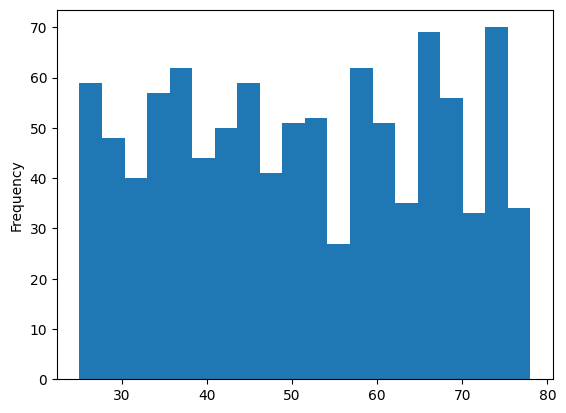

In [26]:
# plot the age distribution
df['age'].plot(kind='hist', bins=20)

<AxesSubplot: >

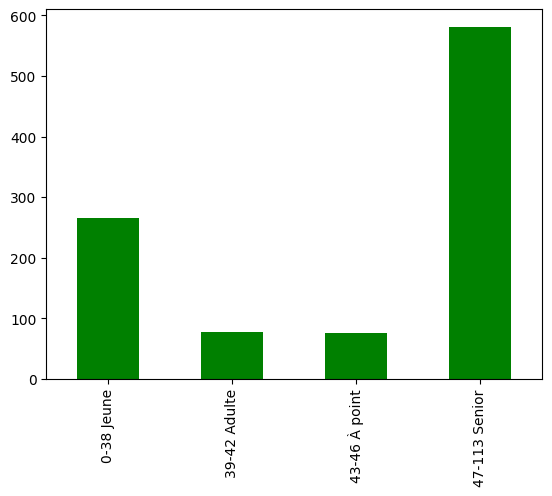

In [27]:
# plot the age category distribution ordered by age
df['age_category'].value_counts().sort_index().plot(kind='bar', color='green')

In [28]:
import plotly.express as px

#  plot the age category distribution ordered by age with plotly
fig = px.histogram(df,
                    x='age_category',
                    color="gender",
                    title='Age category distribution',
                    labels={'age_category': 'Age category','count': 'Number of persons'},
                    barmode='group',
                    category_orders={'age_category': ['0-38 Jeune', '39-42 Adulte', '43-46 À point', '47-113 Senior']}
                    )
fig.show()